## Reading pre processed file

In [2]:
import pandas as pd

df = pd.read_csv('gs://ba820-project-files/processed_reviews.csv')

## EDA

### Correlation Matrix

In [14]:
review_len = len(df['review'])
review_len

213869

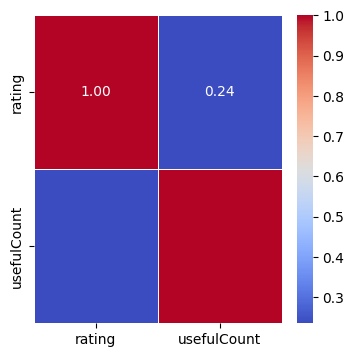

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix for the numerical variables
correlation_matrix = df[['rating', 'usefulCount']].corr(numeric_only=True)
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

### Rating Distribution

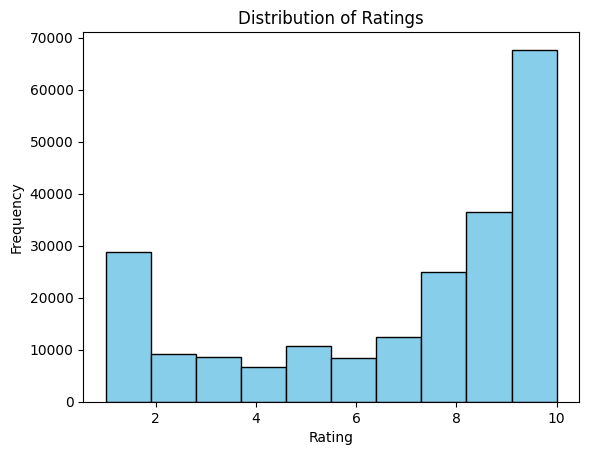

In [5]:
ratings = df['rating']

#histogram showing the frequency of ratings
plt.hist(ratings, bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

plt.show()

### UsefulCount Distribution

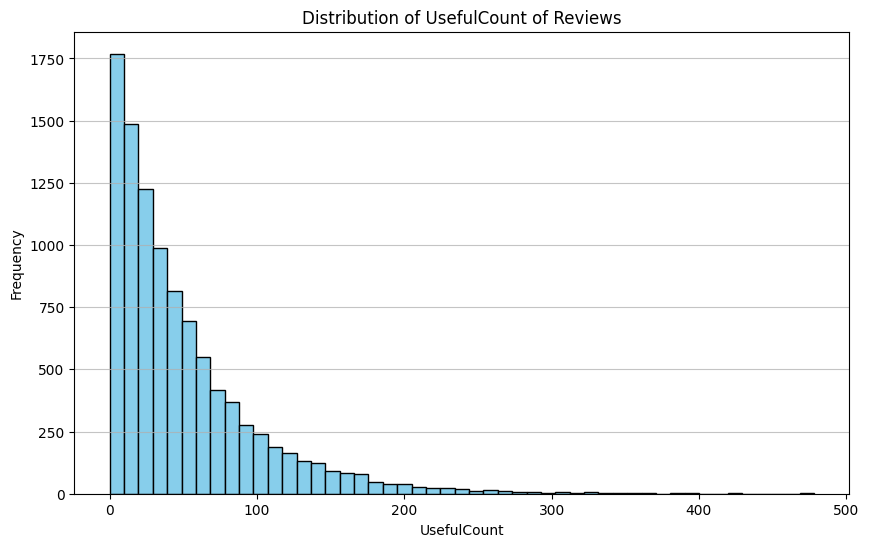

In [6]:
import numpy as np

data = np.random.exponential(scale=50, size=10000)

plt.figure(figsize=(10, 6))

bins = np.linspace(0, max(data), 50)

#plotting the histogram for frequency of usefulcount of reviews
plt.hist(data, bins=bins, color='skyblue',edgecolor="black")

plt.title('Distribution of UsefulCount of Reviews')
plt.xlabel('UsefulCount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

### Time Series of Reviews

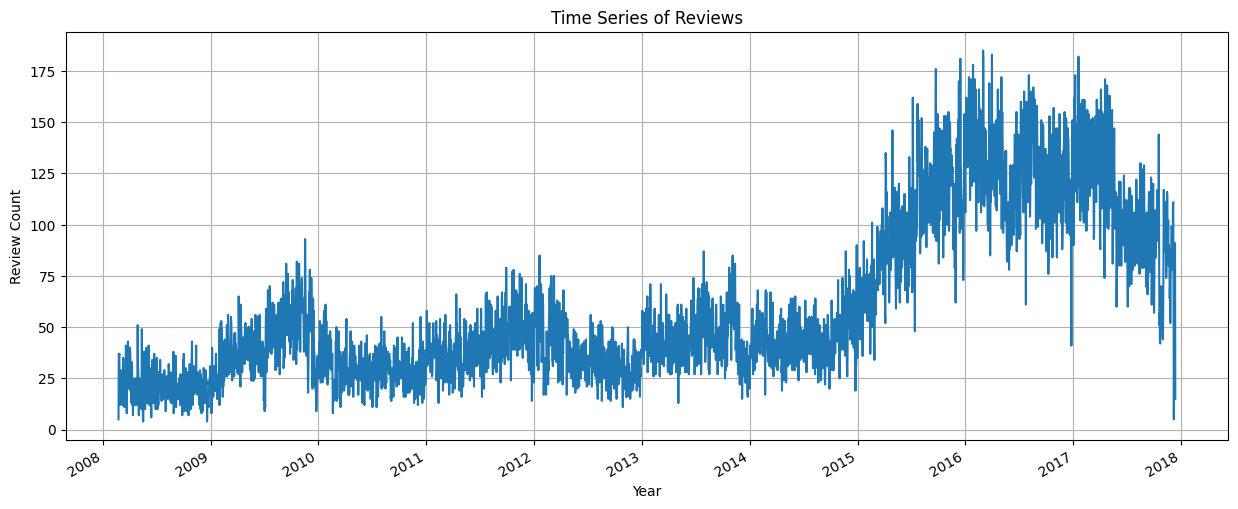

In [7]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and count the number of reviews on each day
review_ts = df.groupby('date').size()

# Plot the time series
plt.figure(figsize=(15, 6))
review_ts.plot()
plt.title('Time Series of Reviews')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

## Most Common Conditions

In [8]:
#count of mentions for each condition
conditions = df['condition'].value_counts()

#top 10 common conditions
common_conditions = conditions.head(10)

print(common_conditions)

condition
Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: count, dtype: int64


### Best drugs for the conditions

In [9]:
top_conditions = common_conditions.index.tolist()
filtered_df = df[df['condition'].isin(top_conditions)]

#getting the mean of ratings
avgratings = filtered_df.groupby(['condition', 'drugName'])['rating'].mean().reset_index()

drugs_sorted_best = avgratings.sort_values(by=['condition', 'rating'], ascending=[True, False])

# Output the top 5 sorted drugs for each condition
for condition in top_conditions:
    print(f"Best for '{condition}':")
    best_drugs = drugs_sorted_best[drugs_sorted_best['condition'] == condition]['drugName'].head(5).tolist()
    print(best_drugs)
    print('')

Best for 'Birth Control':
['Elinest', 'Low-Ogestrel-21', 'Plan B', 'Zovia 1 / 50', 'Heather']

Best for 'Depression':
['Asendin', 'Forfivo XL', 'Invega', 'Limbitrol DS', 'Niravam']

Best for 'Pain':
['Anacin', 'Anaprox-DS', 'Aspirin / caffeine', 'Bupivacaine liposome', 'Buprenex']

Best for 'Anxiety':
['Alprazolam Intensol', 'Aspirin / meprobamate', 'Diazepam Intensol', 'Lorazepam Intensol', 'Micrainin']

Best for 'Acne':
['Acnex', 'Avar', 'Avita', 'BenzEFoam Ultra', 'Benzoyl peroxide / hydrocortisone']

Best for 'Bipolar Disorde':
['Eskalith-CR', 'Klonopin Wafer', 'Tiagabine', 'Nuvigil', 'Armodafinil']

Best for 'Insomnia':
['Ethchlorvynol', 'Hetlioz', 'Nembutal Sodium', 'Pentobarbital', 'Remeron SolTab']

Best for 'Weight Loss':
['Megace', 'Suprenza', 'T-Diet', 'Megace ES', 'Phentercot']

Best for 'Obesity':
['Belviq XR', 'Desoxyn', 'Fastin', 'Ionamin', 'Methamphetamine']

Best for 'ADHD':
['Dextrostat', 'ProCentra', 'Selegiline', 'Desoxyn', 'Cylert']



### Worst drugs for the conditions 

In [10]:
sorted_drugs_worst = avgratings.sort_values(by=['condition', 'rating'], ascending=[True, True])

# Output the worst 5 sorted drugs for each condition
for condition in top_conditions:
    print(f"Worst 5 drugs for '{condition}':")
    worst_drugs = sorted_drugs_worst[sorted_drugs_worst['condition'] == condition]['drugName'].head(5).tolist()
    print(worst_drugs)
    print('')

Worst 5 drugs for 'Birth Control':
['Dasetta 7 / 7 / 7', 'Larin 24 Fe', 'Philith', 'Pirmella 1 / 35', 'Tri-Lo-Estarylla']

Worst 5 drugs for 'Depression':
['Vyvanse', 'Luvox CR', 'Fetzima', 'Levomilnacipran', 'Pamelor']

Worst 5 drugs for 'Pain':
['Capsin', 'Capzasin', 'Dolobid', 'Prialt', 'Ziconotide']

Worst 5 drugs for 'Anxiety':
['Hyzine', 'Vanspar', 'Compazine', 'Prochlorperazine', 'Trileptal']

Worst 5 drugs for 'Acne':
['Tri-Estarylla', 'Junel Fe 1.5 / 30', 'Loestrin Fe 1 / 20', 'Nortrel 1 / 35', 'Microgestin Fe 1.5 / 30']

Worst 5 drugs for 'Bipolar Disorde':
['Carbatrol', 'Risperdal Consta', 'Celexa', 'Depakene', 'Equetro']

Worst 5 drugs for 'Insomnia':
['ZzzQuil', 'Belsomra', 'Suvorexant', 'Valerian', 'Ramelteon']

Worst 5 drugs for 'Weight Loss':
['Contrave', 'Bupropion / naltrexone', 'Fastin', 'Ionamin', 'Qsymia']

Worst 5 drugs for 'Obesity':
['Methylphenidate', 'Alli', 'Bontril PDM', 'Chorionic gonadotropin (hcg)', 'Contrave']

Worst 5 drugs for 'ADHD':
['Tenex', 'Budepr

## Sampling

In [4]:
import numpy as np
np.random.seed = 42

#getting a manageable sample for preliminary analysis
sample_df = df.sample(n=50000, random_state=42).reset_index()
sample_df.shape

(50000, 10)

In [24]:
sample_df.to_csv('sample_50000.csv', index=False)

In [23]:
sample_df

,level_0,index,drugName,condition,review,rating,date,usefulCount,processed_review,sentiment
0,147774,160342,Buspirone,Anxiety,"""Have had some anxiety for the second time in ...",1.0,"October 2, 2016",6,anxieti second time life first time well xan...,negative
1,90307,97984,Nexplanon,Birth Control,"""My implant was inserted in July 2014 and for ...",5.0,"September 10, 2015",2,implant insert juli 2014 first six month spo...,neutral
2,193758,210384,Linzess,Constipation,"""A nurse practitioner gave me samples. I took ...",1.0,"July 13, 2014",54,nurs practition gave sampl took one pill cl...,negative
3,112907,122447,Linaclotide,"Constipation, Chronic","""I&#039;m a 45 yr old woman who has had IBS wi...",9.0,"July 2, 2017",13,45 yr old woman ib chronic constip year de...,positive
4,89225,96812,Ambien,10</span> users found this comment helpful.,"""Yes it works real good im addicted to it. I h...",9.0,"November 20, 2016",10,ye work real good im addict take last 4 year...,positive
...,...,...,...,...,...,...,...,...,...,...
49995,152525,165573,Levonorgestrel,Emergency Contraception,"""The condom broke and by time we both noticed ...",7.0,"May 16, 2017",8,condom broke time notic alreadi late roughli...,positive
49996,47178,51271,Azithromycin,Bronchitis,"""I&#039;ve been in the throws of bronchitis th...",10.0,"October 21, 2015",30,throw bronchiti week start throat sore eve...,positive
49997,100169,108686,Nexplanon,Birth Control,"""Yeast infections, moodiness, depression and n...",1.0,"October 18, 2017",2,yeast infect moodi depress numb finger side...,negative
49998,46392,50420,Gabapentin,Migraine,"""My 11 year old was prescribed Gabapentin for ...",1.0,"July 31, 2013",56,11 year old prescrib gabapentin chronic heada...,negative


## Tokenization

In [13]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize, WhitespaceTokenizer
from nltk.tokenize.casual import TweetTokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sentence Tokenization

In [15]:
tokenized = [[sent_tokenize(review)] for review in sample_df['review']]
#tokenized

### Word Tokenization

In [16]:
tokenized_word = [word_tokenize(review) for review in sample_df['review']]
#tokenized_word.head()

### Punctuation Tokenization

In [17]:
tokenized_punct = [WhitespaceTokenizer().tokenize(review) for review in sample_df['review']]
#tokenized_punct

## Embeddings

### Bag of Words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer() #tokenizer= lambda x: word_tokenize(x), stop_words='english'

cv.fit(sample_df['processed_review'])

print('number of `tokens`', len(cv.vocabulary_))
#cv.vocabulary_

number of `tokens` 31363


In [7]:
print(cv.get_stop_words())

None


In [8]:
dtm = cv.transform(sample_df['processed_review'])
bow = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
bow

,00,000,0000,0001,0002,0003,000vl,001,001mg,002,...,zyprexai,zyprexia,zyrtec,zyrtecd,zytiga,zyvox,zzzquil,zzzzz,zzzzzzzz,іt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
bow.to_csv('bow_50000.csv', index=False)

In [ ]:
recognized_tokens_sentence0 = cv.inverse_transform([bow.iloc[0]])
recognized_tokens_sentence0

### Cosine Similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# Cosine sim
cos_sim = pd.DataFrame(cosine_similarity(bow, bow))
cos_sim

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.100000,0.151186,0.181221,0.158424,0.063246,0.076249,0.163299,0.000000,0.156386,...,0.140449,0.084017,0.082416,0.178737,0.121268,0.025820,0.150111,0.048038,0.037796,0.069749
1,0.100000,1.000000,0.089992,0.060914,0.070725,0.045175,0.000000,0.087482,0.057143,0.089363,...,0.133761,0.100020,0.215852,0.094072,0.069296,0.000000,0.098974,0.045751,0.161985,0.116248
2,0.151186,0.089992,1.000000,0.120873,0.099797,0.039841,0.019213,0.038576,0.000000,0.131352,...,0.044237,0.070567,0.138446,0.035556,0.000000,0.130120,0.101835,0.080697,0.000000,0.058583
3,0.181221,0.060914,0.120873,1.000000,0.211100,0.101130,0.048769,0.152318,0.000000,0.088911,...,0.024953,0.149270,0.102499,0.070197,0.025854,0.082572,0.135401,0.068279,0.000000,0.074352
4,0.158424,0.070725,0.099797,0.211100,1.000000,0.062622,0.015100,0.151585,0.000000,0.144522,...,0.046355,0.166378,0.163209,0.074516,0.000000,0.127827,0.137199,0.031710,0.000000,0.103592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.025820,0.000000,0.130120,0.082572,0.127827,0.163299,0.039375,0.079057,0.000000,0.000000,...,0.000000,0.072310,0.070933,0.024289,0.000000,1.000000,0.149071,0.041345,0.000000,0.090045
4996,0.150111,0.098974,0.101835,0.135401,0.137199,0.000000,0.052827,0.164992,0.000000,0.048154,...,0.054059,0.113183,0.095166,0.065175,0.028006,0.149071,1.000000,0.018490,0.000000,0.134231
4997,0.048038,0.045751,0.080697,0.068279,0.031710,0.000000,0.097677,0.032686,0.000000,0.033389,...,0.037483,0.044845,0.043991,0.060254,0.116510,0.041345,0.018490,1.000000,0.242091,0.074458
4998,0.037796,0.161985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.044237,0.000000,0.103835,0.000000,0.183340,0.000000,0.000000,0.242091,1.000000,0.043937


In [26]:
q = "Acnex has been really good for my acne"

q_vector = cv.transform([q])

simil = pd.DataFrame(cosine_similarity(q_vector, bow), index = [q])

#simil.insert(0, 'Question', q)

In [27]:
simil

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Acnex has been really good for my acne,0.0,0.0,0.0,0.0,0.099015,0.0,0.152499,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
sorted_simil = simil.sort_values(by=q, axis =1, ascending=False)

In [29]:
sorted_simil

,4725,4530,4296,4676,2858,1911,4000,1137,1181,2160,...,1768,1766,1759,1765,1764,1763,1762,1761,1760,4999
Acnex has been really good for my acne,1.0,0.707107,0.707107,0.707107,0.707107,0.5,0.5,0.447214,0.447214,0.439057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using cosine similarity, we are able to get similar sentences to a new one that a user may input into the reviews database. For example, if a user inputs "Acnex has been really good for my acne", we can see that the sentence with index 1181 is similar to this review.

In [30]:
sample_df.iloc[4530]['review']

'"So far so good."'

We can see that the similarity occurs due to the inclusion of the phrase 'good' in this review.

### Word2Vec

In [34]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 44.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
from gensim.models import Word2Vec
import numpy as np

In [ ]:
#We construct and train our own Word2Vec (Not a common practice but just to see how it works.)
model_word2vec = Word2Vec(sentences=tokenized_word, vector_size=300, window=3, min_count=1, workers=4, negative=20, epochs=5000)

print("All words captured by the model:", model_word2vec.wv.key_to_index)
#print("The embedding of", "love", "is", model_word2vec.wv["love"])

# Get the embedding for each word captured by the model.
embeddings = np.array([model_word2vec.wv[word] for word in model_word2vec.wv.key_to_index])

In [ ]:
print("The embedding of", "xanax", "is", model_word2vec.wv["xanax"])

# Get the embedding for each word captured by the model.
embeddings = np.array([model_word2vec.wv[word] for word in model_word2vec.wv.key_to_index])

In [ ]:
print("The embedding of", "nexplanon", "is", model_word2vec.wv["nexplanon"])

#Nexplanon

In [ ]:
embeddings

In [ ]:
embeddings.shape